# This script aims at developing the build_shapes script on the basis of PyPSA-Eur

In [25]:
# import
import os
import sys

# IMPORTANT: RUN SCRIPT FROM THIS SCRIPTS DIRECTORY i.e data_exploration/ TODO: make more robust
# os.chdir(os.path.dirname(os.path.abspath(__file__)))
sys.path.append("./../../scripts")

import logging
import shutil

import geopandas as gpd
import geoplot as gplt
import fiona

import numpy as np
import pandas as pd
import requests
import zipfile
import matplotlib.pyplot as plt
from esy.osmfilter import run_filter
from esy.osmfilter import Node, Relation, Way
from esy.osmfilter import osm_info as osm_info
from esy.osmfilter import osm_pickle as osm_pickle

from iso_country_codes import AFRICA_CC
#from ..scripts.iso_country_codes import AFRICA_CC

from shapely.geometry import LineString, Point, Polygon

logger = logging.getLogger(__name__)

In [5]:

from _helpers import configure_logging, _sets_path_to_root, _two_2_three_digits_country, _three_2_two_digits_country
_three_2_two_digits_country("AFG")

'AF'

In [76]:
test_CC = {"ZAF": "SOUTH AFRICA", "NGA": "Nigeria"} # or any other country
update = True

def download_GADM(country_code, update=False):
    """
    Download gpkg file from GADM for a given country code

    Parameters
    ----------
    country_code : str 
        Three letter country codes of the downloaded files 
    update : bool 
        Name of the network component 
        Update = true, forces re-download of files

    Returns
    -------
    gpkg file per country

    """

    GADM_filename = f"gadm36_{country_code}"
    GADM_url = f"https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/{GADM_filename}_gpkg.zip"

    GADM_inputfile_zip = os.path.join(
        os.getcwd(), "data", "gadm", GADM_filename, GADM_filename + ".zip"
    )  # Input filepath zip

    GADM_inputfile_gpkg = os.path.join(
        os.getcwd(), "data", "gadm", GADM_filename, GADM_filename + ".gpkg"
    )  # Input filepath gpkg

    if not os.path.exists(GADM_inputfile_zip) or update is True:
        print(f"{GADM_filename} does not exist, downloading to {GADM_inputfile_zip}")
        #  create data/osm directory
        os.makedirs(os.path.dirname(GADM_inputfile_zip), exist_ok=True)

        with requests.get(GADM_url, stream=True) as r:
            with open(GADM_inputfile_zip, "wb") as f:
                shutil.copyfileobj(r.raw, f)

        with zipfile.ZipFile(GADM_inputfile_zip,"r") as zip_ref:
            zip_ref.extractall(os.path.dirname(GADM_inputfile_zip))
    
    return GADM_inputfile_gpkg, GADM_filename

# download GADM gpkg files of selected countries
for country_code in test_CC.keys():
    # download file gpkgS
    file_gpkg, _ = download_GADM(country_code, False)
    print(file_gpkg)

print("Completed")

gadm36_ZAF does not exist, downloading to c:\Users\Davide\Git\pypsa-africa\scripts\data\gadm\gadm36_ZAF\gadm36_ZAF.zip


ConnectionError: HTTPSConnectionPool(host='biogeo.ucdavis.edu', port=443): Max retries exceeded with url: /data/gadm3.6/gpkg/gadm36_ZAF_gpkg.zip (Caused by NewConnectionError("<urllib3.connection.HTTPSConnection object at 0x0000020A002C3A08>: Failed to establish a new connection: [WinError 10060] Impossibile stabilire la connessione. Risposta non corretta della parte connessa dopo l'intervallo di tempo oppure mancata risposta dall'host collegato"))

In [ ]:
# download gpkg files of selected countries and append them to a single GeoDataFrame for each desired layer

layers = [0, 2]

# initialize dictionary for all geodataframe by layer
geodf_all = {layer: gpd.GeoDataFrame() for layer in layers}

def get_GADM_layer(country_list, layer, update=False):
    # initialization of the geoDataFrame
    geodf_GADM = gpd.GeoDataFrame()

    for country_code in country_list:
        # download file gpkg
        file_gpkg, name_file = download_GADM(country_code, False)

        # get layers of a geopackage
        list_layers = fiona.listlayers(file_gpkg)

        # read gpkg file
        geodf_temp = gpd.read_file(file_gpkg, layer=list_layers[list_layers[layer]]) #name_file+"_"+str(layer))

        # append geodataframes
        geodf_GADM = geodf_GADM.append(geodf_temp)
    
    geodf_GADM.reset_index(drop=True, inplace=True)

    return geodf_GADM

geodf_GADM_countries = get_GADM_layer(test_CC.keys(), 0, update=False) # layer 0 is country shapes
geodf_GADM_NUTS3 = get_GADM_layer(test_CC.keys(), 2, update=False) # layer 2 are the most fine shapes available (to be checked if always available)

In [ ]:
geodf_GADM_countries

In [ ]:
geodf_GADM_NUTS3.plot()

In [ ]:
# # download file gpkg
# file_gpkg = download_gpkg(list(test_CC.keys())[0], False)

# print(fiona.listlayers(file_gpkg))

# # read gpkg file
# geodf_temp = gpd.read_file(file_gpkg, layer="gadm36_ZAF_0")
# geodf_temp.plot()

In [3]:
import pandas as pd

df = pd.DataFrame()

df["ciao"] = list(range(0, 15))
df["ciao"] = [10 - c for c in df["ciao"]]
df["ciao"]

0     10
1      9
2      8
3      7
4      6
5      5
6      4
7      3
8      2
9      1
10     0
11    -1
12    -2
13    -3
14    -4
Name: ciao, dtype: int64

In [16]:
import fiona
EEZ_gpkg = os.path.join(
    os.getcwd(), "data", "raw", "eez", "eez_v11.gpkg"
)  # Input filepath gpkg

geodf_EEZ = gpd.read_file(EEZ_gpkg)

fiona.listlayers(EEZ_gpkg)

['eez_v11']

In [28]:
selected_countries_codes = ["AF"]

In [33]:
_three_2_two_digits_country("None")

nan

In [29]:
import numpy as np
np.nan in ["AF"]

False

In [46]:
print(geodf_EEZ.loc[18, "ISO_TER1"])

None


In [48]:
geodf_EEZ

,MRGID,GEONAME,MRGID_TER1,POL_TYPE,MRGID_SOV1,TERRITORY1,ISO_TER1,SOVEREIGN1,MRGID_TER2,MRGID_SOV2,...,ISO_SOV1,ISO_SOV2,ISO_SOV3,UN_SOV1,UN_SOV2,UN_SOV3,UN_TER1,UN_TER2,UN_TER3,geometry
0,8444.0,American Samoa Exclusive Economic Zone,8670.0,200NM,2204.0,American Samoa,ASM,United States,0.0,0.0,...,USA,None,None,840,NaN,NaN,16.0,NaN,NaN,"MULTIPOLYGON (((-166.64112 -17.55527, -166.641..."
1,8379.0,Ascension Exclusive Economic Zone,8620.0,200NM,2208.0,Ascension,SHN,United Kingdom,0.0,0.0,...,GBR,None,None,826,NaN,NaN,654.0,NaN,NaN,"MULTIPOLYGON (((-10.93328 -7.88745, -10.93324 ..."
2,8446.0,Cook Islands Exclusive Economic Zone,8672.0,200NM,2227.0,Cook Islands,COK,New Zealand,0.0,0.0,...,NZL,None,None,554,NaN,NaN,184.0,NaN,NaN,"MULTIPOLYGON (((-159.27579 -5.80051, -158.3846..."
3,8389.0,Overlapping claim Falkland / Malvinas Islands:...,8623.0,Overlapping claim,2208.0,Falkland / Malvinas Islands,FLK,United Kingdom,8623.0,2149.0,...,GBR,ARG,None,826,32.0,NaN,238.0,238.0,NaN,"MULTIPOLYGON (((-58.54196 -56.22782, -61.62049..."
4,8440.0,French Polynesian Exclusive Economic Zone,8656.0,200NM,17.0,French Polynesia,PYF,France,0.0,0.0,...,FRA,None,None,250,NaN,NaN,258.0,NaN,NaN,"MULTIPOLYGON (((-135.93245 -7.89001, -135.9290..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,5693.0,Spanish Exclusive Economic Zone,2185.0,200NM,2185.0,Spain,ESP,Spain,0.0,0.0,...,ESP,None,None,724,NaN,NaN,724.0,NaN,NaN,"MULTIPOLYGON (((4.54375 42.44867, 4.86147 42.0..."
277,62589.0,Chagos Archipelago Exclusive Economic Zone,8616.0,200 NM,8614.0,Chagos Archipelago,None,Mauritius,0.0,0.0,...,MUS,None,None,480,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((75.83452 -5.23039, 75.83260 -5..."
278,8383.0,Overlapping claim South Georgia and South Sand...,8624.0,Overlapping claim,2208.0,South Georgia and the South Sandwich Islands,SGS,United Kingdom,8624.0,2149.0,...,GBR,ARG,None,826,32.0,NaN,239.0,239.0,NaN,"MULTIPOLYGON (((-37.13953 -50.64608, -37.03619..."
279,8402.0,Bermudian Exclusive Economic Zone,8636.0,200NM,2208.0,Bermuda,BMU,United Kingdom,0.0,0.0,...,GBR,None,None,826,NaN,NaN,60.0,NaN,NaN,"MULTIPOLYGON (((-60.70499 32.39114, -60.70499 ..."


In [59]:
a = geodf_EEZ.dropna(axis=0, how="any", subset=["ISO_TER1"]).reset_index().copy()
a["ISO_TER1"][17]

'CHL'

In [34]:
[print(_three_2_two_digits_country(x)) for x in geodf_EEZ["ISO_TER1"]]

AS
SH
CK
FK
PF
PN
SH
WS
TO
SH
CL
NU
UY
PE
UY
TK
PE
CL


LookupError: 

In [24]:
geodf_EEZ.ISO_TER1.unique()

array(['ASM', 'SHN', 'COK', 'FLK', 'PYF', 'PCN', 'WSM', 'TON', 'CHL',
       'NIU', 'URY', 'PER', 'TKL', None, 'KIR', 'ARG', 'ATF', 'CXR',
       'CCK', 'COM', 'MYT', 'HMD', 'MDG', 'ZAF', 'NCL', 'NFK', 'MUS',
       'REU', 'VUT', 'NAM', 'COG', 'AGO', 'MOZ', 'KEN', 'PNG', 'TZA',
       'SLB', 'SYC', 'COD', 'AUS', 'TLS', 'AIA', 'ATG', 'ABW', 'BHS',
       'BRB', 'MEX', 'BES', 'VGB', 'CPV', 'CYM', 'PAN', 'CRI', 'CUW',
       'DMA', 'DOM', 'GTM', 'FRO', 'GMB', 'GIB', 'GRD', 'GLP', 'SLE',
       'ISL', 'JAM', 'MRT', 'MSR', 'UMI', 'PRI', 'BLM', 'KNA', 'LCA',
       'MAF', 'SPM', 'VCT', 'SXM', 'TTO', 'TCA', 'VIR', 'PRT', 'SLV',
       'BLZ', 'CUB', 'HTI', 'MTQ', 'SEN', 'VEN', 'FRA', 'GBR', 'CAN',
       'NIC', 'GUY', 'COL', 'IRL', 'GGY', 'JEY', 'GNB', 'GIN', 'CIV',
       'LBR', 'HND', 'ECU', 'ESH', 'SUR', 'GUF', 'MAR', 'ARE', 'CYP',
       'EGY', 'ERI', 'GEO', 'IRN', 'LBN', 'LBY', 'MLT', 'OMN', 'SAU',
       'LKA', 'SDN', 'SYR', 'TGO', 'GRC', 'TUR', 'MCO', 'TUN', 'MNE',
       'ALB', 'BGR', 

In [75]:
test_CC = {"AFG": "d"} # or any other country
update = False

def load_EEZ(selected_countries_codes, name_file = "eez_v11.gpkg"):
    EEZ_gpkg = os.path.join(
        os.getcwd(), "data", "raw", "eez", name_file
    )  # Input filepath gpkg

    if not os.path.exists(EEZ_gpkg):
        raise Exception(f"File EEZ {name_file} not found, please download it from https://www.marineregions.org/download_file.php?name=World_EEZ_v11_20191118_gpkg.zip and copy it in {os.path.dirname(EEZ_gpkg)}")
    
    geodf_EEZ = gpd.read_file(EEZ_gpkg)
    geodf_EEZ = geodf_EEZ[["ISO_TER1", "geometry"]] # [["ISO_TER1", "TERRITORY1", "ISO_SOV1", "ISO_SOV2", "ISO_SOV3", "geometry"]]
    geodf_EEZ = geodf_EEZ[[any([x in selected_countries_codes]) for x in geodf_EEZ["ISO_TER1"]]]
    geodf_EEZ.reset_index(drop=True, inplace=True)
    
    geodf_EEZ.rename(columns = {"ISO_TER1": "name"}, inplace=True)

    return geodf_EEZ

geodf_EEZ = load_EEZ(test_CC.keys())

#print(geodf_EEZ.keys())
geodf_EEZ.head()

,name,geometry


In [ ]:
file_country_shapes_clean = os.path.join(os.getcwd(), "data", "clean", "eez", "country_shapes" + ".geojson")
file_off_shore_shapes_clean = os.path.join(os.getcwd(), "data", "clean", "eez", "off_shore_shapes" + ".geojson")
os.makedirs(os.path.dirname(file_country_shapes_clean), exist_ok=True)

# country shapes
geodf_country = geodf_GADM_countries[["GID_0", "geometry"]].copy()
geodf_country.rename(columns = {"GID_0": "name"}, inplace=True)

geodf_country.to_file(file_country_shapes_clean, driver="GeoJSON")  # Generate GeoJson
geodf_EEZ.to_file(file_off_shore_shapes_clean, driver="GeoJSON")  # Generate GeoJson

In [6]:
import pycountry as pyc

def _get_country(target, **keys):
    """
    Function to convert country codes using pycountry
    
    Parameters
    ----------
    target: str
        Desired type of country code.
        Examples:
            - 'alpha_3' for 3-digit
            - 'alpha_2' for 2-digit
            - 'name' for full country name
    
    keys: dict
        Specification of the country name and reference system.
        Examples:
            - alpha_3="ZAF" for 3-digit
            - alpha_2="ZA" for 2-digit
            - name="South Africa" for full country name
    
    Returns
    -------
    country code as requested in keys or np.nan, when country code is not recognized

    Example of usage
    -------
    - Convert 2-digit code to 3-digit codes: _get_country('alpha_3', alpha_2="ZA")
    - Convert 3-digit code to 2-digit codes: _get_country('alpha_2', alpha_3="ZAF")
    - Convert 2-digit code to full name: _get_country('name', alpha_2="ZA")
    
    """
    
    assert len(keys) == 1
    try:
        return getattr(pyc.countries.get(**keys), target)
    except (KeyError, AttributeError):
        return np.nan
        

def _two_2_three_digits_country(two_code_country):
    """
    Convert 2-digit to 3-digit country code:
    
    Parameters
    ----------
    two_code_country: str
        2-digit country name
    
    Returns
    ----------
    three_code_country: str
        3-digit country name
    """
    three_code_country = _get_country('alpha_3', alpha_2=two_code_country)
    return three_code_country
        

def _three_2_two_digits_country(three_code_country):
    """
    Convert 3-digit to 2-digit country code:
    
    Parameters
    ----------
    three_code_country: str
        3-digit country name
    
    Returns
    ----------
    two_code_country: str
        2-digit country name
    """
    two_code_country = _get_country('alpha_2', alpha_3=three_code_country)
    return two_code_country
        

def _two_digits_2_name_country(two_code_country):
    """
    Convert 2-digit country code to full name country:
    
    Parameters
    ----------
    two_code_country: str
        2-digit country name
    
    Returns
    ----------
    full_name: str
        full country name
    """
    full_name = _get_country('name', alpha_2=two_code_country)
    return full_name

print(_two_2_three_digits_country("ZA"))
print(_three_2_two_digits_country("ZAF"))
print(_two_digits_2_name_country("ZA"))

ZAF
ZA
South Africa


In [64]:
_two_2_three_digits_country("ZA").upper()

'ZAF'

In [9]:
def download_WorldPop(country_code, year=2020, update=False, out_logging=True):
    """
    Download tiff file for each country code

    Parameters
    ----------
    country_code : str 
        Two letter country codes of the downloaded files.
        Files downloaded from https://data.worldpop.org/ datasets WorldPop UN adjusted
    update : bool 
        Update = true, forces re-download of files

    Returns
    -------
    gpkg file per country

    """
    
    # UN not adjusted
    # WorldPop_filename = f"{_two_2_three_digits_country(country_code).lower()}_ppp_{year}_constrained.tif"
    # WorldPop_url = f"https://data.worldpop.org/GIS/Population/Global_2000_2020_Constrained/2020/BSGM/{_two_2_three_digits_country(country_code).upper()}/{WorldPop_filename}"

    WorldPop_filename = f"{_two_2_three_digits_country(country_code).lower()}_ppp_{year}_UNadj_constrained.tif"
    WorldPop_url = f"https://data.worldpop.org/GIS/Population/Global_2000_2020_Constrained/2020/BSGM/{_two_2_three_digits_country(country_code).upper()}/{WorldPop_filename}"

    WorldPop_inputfile = os.path.join(
        os.path.dirname(os.getcwd()), "data", "raw", "WorldPop", WorldPop_filename
    )  # Input filepath zip

    if not os.path.exists(WorldPop_inputfile) or update is True:
        if out_logging:
            print(f"{WorldPop_filename} does not exist, downloading to {WorldPop_inputfile}")
        #  create data/osm directory
        os.makedirs(os.path.dirname(WorldPop_inputfile), exist_ok=True)

        with requests.get(WorldPop_url, stream=True) as r:
            with open(WorldPop_inputfile, "wb") as f:
                shutil.copyfileobj(r.raw, f)
    
    return WorldPop_inputfile, WorldPop_filename

download_WorldPop("AF")

('c:\\Users\\Davide\\Git\\pypsa-africa\\data\\raw\\WorldPop\\afg_ppp_2020_UNadj_constrained.tif',
 'afg_ppp_2020_UNadj_constrained.tif')

In [1]:
def download_GADM(country_code, update=False):
    """
    Download gpkg file from GADM for a given country code

    Parameters
    ----------
    country_code : str 
        Two letter country codes of the downloaded files 
    update : bool
        Update = true, forces re-download of files

    Returns
    -------
    gpkg file per country

    """

    GADM_filename = f"gadm36_{_two_2_three_digits_country(country_code)}"
    GADM_url = f"https://biogeo.ucdavis.edu/data/gadm3.6/gpkg/{GADM_filename}_gpkg.zip"

    GADM_inputfile_zip = os.path.join(
        os.path.dirname(os.getcwd()), "data", "raw", "gadm", GADM_filename, GADM_filename + ".zip"
    )  # Input filepath zip

    GADM_inputfile_gpkg = os.path.join(
        os.path.dirname(os.getcwd()), "data", "raw", "gadm", GADM_filename, GADM_filename + ".gpkg"
    )  # Input filepath gpkg

    if not os.path.exists(GADM_inputfile_gpkg) or update is True:
        print(f"{GADM_filename} does not exist, downloading to {GADM_inputfile_zip}")
        #  create data/osm directory
        os.makedirs(os.path.dirname(GADM_inputfile_zip), exist_ok=True)

        with requests.get(GADM_url, stream=True) as r:
            with open(GADM_inputfile_zip, "wb") as f:
                shutil.copyfileobj(r.raw, f)

        with zipfile.ZipFile(GADM_inputfile_zip,"r") as zip_ref:
            zip_ref.extractall(os.path.dirname(GADM_inputfile_zip))
    
    return GADM_inputfile_gpkg, GADM_filename


def get_GADM_layer(country_list, layer_id, update=False):
    """
    Function to retrive a specific layer id of a geopackage for a selection of countries
    """

    # initialization of the geoDataFrame
    geodf_GADM = gpd.GeoDataFrame()

    for country_code in country_list:
        # download file gpkg
        file_gpkg, name_file = download_GADM(country_code, False)

        # get layers of a geopackage
        list_layers = fiona.listlayers(file_gpkg)

        # read gpkg file
        geodf_temp = gpd.read_file(file_gpkg, layer = list_layers[layer_id])

        # convert country name representation of the main country (GID_0 column)
        geodf_temp["GID_0"] = [_three_2_two_digits_country(twoD_c) for twoD_c in geodf_temp["GID_0"]]

        # append geodataframes
        geodf_GADM = geodf_GADM.append(geodf_temp)
    
    geodf_GADM.reset_index(drop=True, inplace=True)

    return geodf_GADM

In [94]:
import fiona
import rasterio

def add_population_data_nuts3(df_nuts3, country_codes, year=2020):
    """Function to add the population info for each country shape in the dataset"""

    # initialize new population column
    df_nuts3["pop"] = 0

    for c_code in country_codes:
        WorldPop_inputfile, WorldPop_filename = download_WorldPop(country_code, year, update=False, out_logging=False)

        with rasterio.open("tests/data/RGB.byte.tif") as src:
            geoms = df_nuts3.loc[df_nuts3["country"] == c_code, "geometry"]

            out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True)
            out_meta = src.meta

        ret = rasterio.features.geometry_mask()
                

SyntaxError: unexpected EOF while parsing (<ipython-input-94-9a0c34be8dfb>, line 18)

In [79]:
import fiona
import rasterio
from rasterio.mask import mask

update=False
countries = ["AF"]
country_codes = ["AF"]

# download data if needed and get the last layer id [-1], corresponding to the highest resolution
df_nuts3 = get_GADM_layer(countries, -1, update)

# select and rename columns
# df_eez = df_eez[["GID_0", "geometry"]].copy()
df_nuts3.rename(columns = {"GID_0": "country"}, inplace=True)

def add_population_data_nuts3(df_nuts3, country_codes, year=2020):
    """Function to add the population info for each country shape in the dataset"""
    # initialize new population column
    df_nuts3["pop"] = 0

    for c_code in country_codes:
        WorldPop_inputfile, WorldPop_filename = download_WorldPop(c_code, 2020, update=False, out_logging=False)

        with rasterio.open(WorldPop_inputfile) as src:
            print(src)
            country_rows = df_nuts3.loc[df_nuts3["country"] == c_code]

            for index, row in country_rows.iterrows():
                # select the desired area of the raster corresponding to each polygon
                out_image, out_transform = mask(src, row["geometry"], all_touched=True, invert = False, nodata=0.0)

                # print(out_image)
                
                # calculate total population in the selected geometry
                pop_by_geom = sum(sum(out_image[0]))

                print(index, " out of ", df_nuts3.shape[0])
                # print(pop_by_geom)

                # update the population data in the dataset
                df_nuts3.loc[index, "pop"] = pop_by_geom
                # print(country_rows.loc[index, "pop"])

                # df_nuts3.loc[df_nuts3["country"] == c_code]["pop"] = pop_by_geom

                # out_meta = src.meta
                # print(src.meta)
                # print(out_transform)
                # print(out_image)
                # out_pop = map(out_image, lambda x: sum(sum(x)))
                # out_pixels = map(out_image, lambda x: sum(sum(x > 0.001)))
                # print(out_pop)
                # print(out_pixels)
                # with rasterio.open("masked2.tif", "w", **out_meta) as dest:
                #     dest.write(out_image)
add_population_data_nuts3(df_nuts3, ["AF"])
print(sum(df_nuts3["pop"]))

<open DatasetReader name='c:\Users\Davide\Git\pypsa-africa\data\raw\WorldPop\afg_ppp_2020_UNadj_constrained.tif' mode='r'>
0  out of  328
1  out of  328
2  out of  328
3  out of  328
4  out of  328
5  out of  328
6  out of  328
7  out of  328
8  out of  328
9  out of  328
10  out of  328
11  out of  328
12  out of  328
13  out of  328
14  out of  328
15  out of  328
16  out of  328
17  out of  328
18  out of  328
19  out of  328
20  out of  328
21  out of  328
22  out of  328
23  out of  328
24  out of  328
25  out of  328
26  out of  328
27  out of  328
28  out of  328
29  out of  328
30  out of  328
31  out of  328
32  out of  328
33  out of  328
34  out of  328
35  out of  328
36  out of  328
37  out of  328
38  out of  328
39  out of  328
40  out of  328
41  out of  328
42  out of  328
43  out of  328
44  out of  328
45  out of  328
46  out of  328
47  out of  328
48  out of  328
49  out of  328
50  out of  328
51  out of  328
52  out of  328
53  out of  328
54  out of  328
55  out

In [44]:
df_nuts3.iloc[[0,1]].copy()

,country,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,pop
0,AF,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.1_1,Baharak,None,None,Wuleswali,District,None,AF.BD.BA,"MULTIPOLYGON (((71.18169 36.49196, 71.18560 36...",0
1,AF,Afghanistan,AFG.1_1,Badakhshan,None,AFG.1.2_1,Darwaz,None,None,Wuleswali,District,None,AF.BD.DA,"MULTIPOLYGON (((71.33762 38.11841, 71.33733 38...",0


In [67]:
a = np.ones((2,3))
a

ut_pop = [sum(sum(x)) for x in [a]]
ut_pop

[6.0]

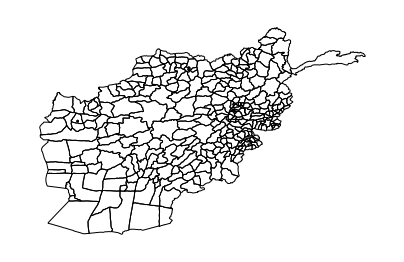

In [49]:
ax = gplt.polyplot(df_nuts3["geometry"], figsize=(7, 8))
#gplt.polyplot(df_nuts3.iloc[[0,1]].copy(), ax=ax)

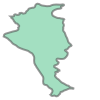

In [33]:
df_nuts3.loc[df_nuts3["country"] == "AF", "geometry"][0]